<div style='background-image: url("../share/baku.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Handling Station Metadata</div>
        </div>
    </div>
</div>
image: User:Abbaszade656 / Wikimedia Commons / <a href="http://creativecommons.org/licenses/by-sa/4.0/">CC-BY-SA-4.0</a>

## Workshop for the "Training in Network Management Systems and Analytical Tools for Seismic"
### Baku, October 2018

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))
---

![](images/obspy_logo_full_524x179px.png)

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

- for station metadata, the de-facto standard of the future (replacing SEED/RESP) is [FDSN StationXML](http://www.fdsn.org/xml/station/)
- FDSN StationXML files can be read using **`read_inventory()`**

In [2]:
import obspy

inventory = obspy.read_inventory("./data/station_PFO.xml")
print(type(inventory))

<class 'obspy.core.inventory.inventory.Inventory'>


- the nested ObsPy Inventory class structure (Inventory/Station/Channel/Response/...) is closely modelled after FDSN StationXML
<img src="images/Inventory.svg" width=90%>

In [3]:
!head data/station_BFO.xml

<?xml version="1.0" encoding="UTF-8"?>
<FDSNStationXML xmlns="http://www.fdsn.org/xml/station/1" schemaVersion="1.0">
  <Source>SeisComP3</Source>
  <Sender>ODC</Sender>
  <Created>2015-02-20T10:41:48</Created>
  <Network code="GR" startDate="1976-02-17T00:00:00" restrictedStatus="open">
    <Description>German Regional Seismic Network, BGR Hannover</Description>
    <Station code="BFO" startDate="1991-01-01T00:00:00" restrictedStatus="open">
      <Latitude>48.3311</Latitude>
      <Longitude>8.3303</Longitude>


In [4]:
print(inventory)

Inventory created at 2014-02-17T15:43:45.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.0.11
		    http://service.iris.edu/fdsnws/station/1/query?network=II&level=res...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (1):
			II.PFO (Pinon Flat, California, USA)
		Channels (2):
			II.PFO.00.BHZ, II.PFO.10.BHZ


In [5]:
network = inventory[0]
print(network)

Network II (Global Seismograph Network (GSN - IRIS/IDA))
	Station Count: 1/50 (Selected/Total)
	1986-01-01T00:00:00.000000Z - 2020-12-12T23:59:59.000000Z
	Access: open
	Contains:
		Stations (1):
			II.PFO (Pinon Flat, California, USA)
		Channels (2):
			II.PFO.00.BHZ, II.PFO.10.BHZ


In [6]:
station = network[0]
print(station)

Station PFO (Pinon Flat, California, USA)
	Station Code: PFO
	Channel Count: 2/250 (Selected/Total)
	2006-07-13T00:00:00.000000Z - 2020-12-31T23:59:59.000000Z
	Access: open 
	Latitude: 33.61, Longitude: -116.46, Elevation: 1280.0 m
	Available Channels:
		PFO.00.BHZ, PFO.10.BHZ


In [7]:
channel = station[0]
print(channel)

Channel 'BHZ', Location '00' 
	Time range: 2010-07-30T18:50:00.000000Z - 2012-07-02T03:59:59.000000Z
	Latitude: 33.61, Longitude: -116.46, Elevation: 1280.0 m, Local Depth: 5.3 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 20.00 Hz
	Sensor (Description): Streckeisen STS-1 Seismometer with Metrozet E300 (None)
	Response information available


In [8]:
print(channel.response)

Channel Response
	From M/S (Velocity in Meters Per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 5.24814e+09 defined at 0.050 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 3314.4
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.58333e+06
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1


In [9]:
st = obspy.read("./data/waveform_PFO.mseed")
print(st)

2 Trace(s) in Stream:
II.PFO.00.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.969500Z | 20.0 Hz, 60000 samples
II.PFO.10.BHZ | 2011-03-11T05:46:23.019500Z - 2011-03-11T06:36:22.994500Z | 40.0 Hz, 120000 samples


In [10]:
inv = obspy.read_inventory("./data/station_PFO.xml", format="STATIONXML")

In [11]:
print(st[0].stats)

         network: II
         station: PFO
        location: 00
         channel: BHZ
       starttime: 2011-03-11T05:46:23.019500Z
         endtime: 2011-03-11T06:36:22.969500Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 60000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'encoding': 'STEIM1', 'filesize': 356352, 'record_length': 4096, 'byteorder': '>', 'number_of_records': 87})


- the instrument response can be deconvolved from the waveform data using the convenience method **`Stream.remove_response()`**
- evalresp is used internally to calculate the instrument response

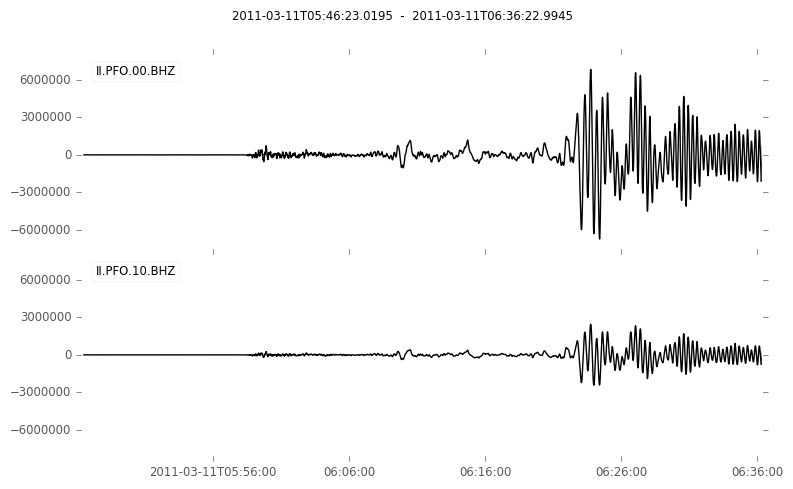

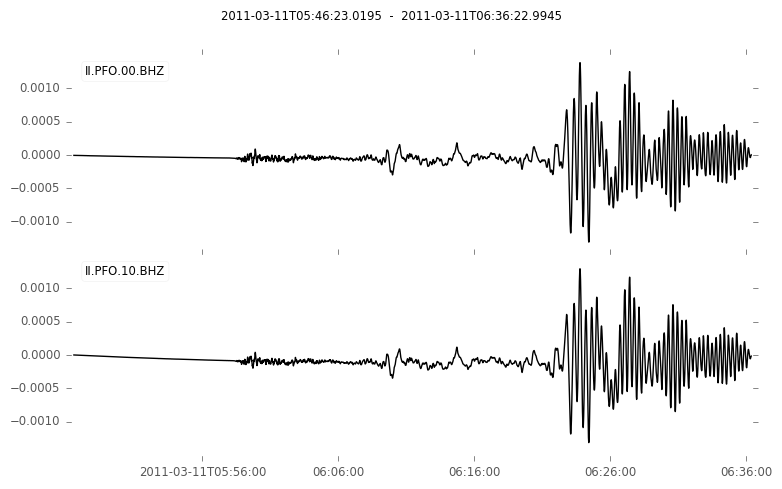

In [12]:
st.plot()
st.remove_response(inventory=inv)
st.plot()

- several options can be used to specify details of the deconvolution (water level, frequency domain prefiltering), output units (velocity/displacement/acceleration), demeaning, tapering and to specify if any response stages should be omitted

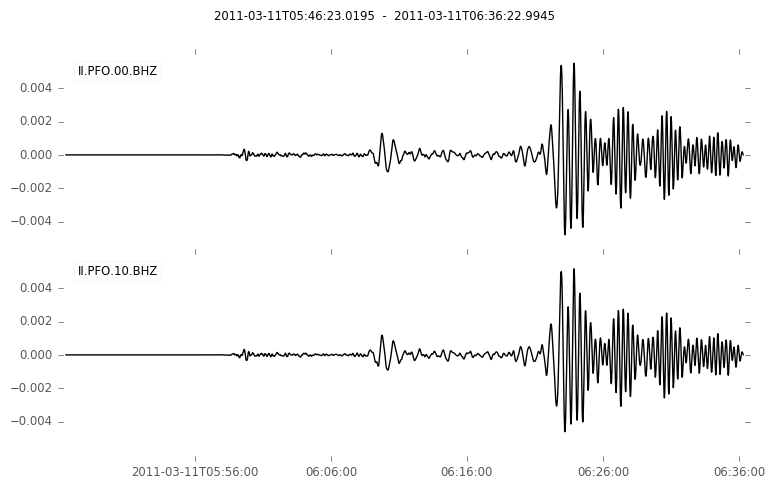

In [13]:
st = obspy.read("./data/waveform_PFO.mseed")
st.remove_response(inventory=inv, water_level=60, pre_filt=(0.01, 0.02, 8, 10), output="DISP")
st.plot()

Finally, if station metadata is not available from the operator or from the data center serving the data, or in case of temporary station deployments and field campaigns, full station metadata can be assembled using ObsPy, including response information gathered from the [IRIS Nominal Response Library (NRL)](http://ds.iris.edu/NRL/):
<img src="images/nrl.png" width=70%>

In [14]:
import obspy
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.clients.nrl.client import NRL


# We'll first create all the various objects. These strongly follow the
# hierarchy of StationXML files.
inv = Inventory(
    # We'll add networks later.
    networks=[],
    # The source should be the id whoever create the file.
    source="ObsPy-Tutorial")

net = Network(
    # This is the network code according to the SEED standard.
    code="XX",
    # A list of stations. We'll add one later.
    stations=[],
    description="A test stations.",
    # Start-and end dates are optional.
    start_date=obspy.UTCDateTime(2016, 1, 2))

sta = Station(
    # This is the station code according to the SEED standard.
    code="ABC",
    latitude=1.0,
    longitude=2.0,
    elevation=345.0,
    creation_date=obspy.UTCDateTime(2016, 1, 2),
    site=Site(name="First station"))

cha = Channel(
    # This is the channel code according to the SEED standard.
    code="HHZ",
    # This is the location code according to the SEED standard.
    location_code="",
    # Note that these coordinates can differ from the station coordinates.
    latitude=1.0,
    longitude=2.0,
    elevation=345.0,
    depth=10.0,
    azimuth=0.0,
    dip=-90.0,
    sample_rate=200)

# By default this accesses the always up-to-date NRL online.
# Offline copies of the NRL can also be used instead.
nrl = NRL()
# The contents of the NRL can be explored interactively in a Python prompt,
# see API documentation of NRL submodule:
# http://docs.obspy.org/packages/obspy.clients.nrl.html
# Here we assume that the end point of data logger and sensor are already
# known:
response = nrl.get_response( # doctest: +SKIP
    sensor_keys=['Nanometrics', 'Trillium Compact', '120 s'],
    datalogger_keys=['REF TEK', 'RT 130 & 130-SMA', '1', '200'])


# Now tie it all together.
cha.response = response
sta.channels.append(cha)
net.stations.append(sta)
inv.networks.append(net)

# And finally write it to a StationXML file. We also force a validation against
# the StationXML schema to ensure it produces a valid StationXML file.
#
# Note that it is also possible to serialize to any of the other inventory
# output formats ObsPy supports.
print(inv)
print(inv[0][0][0])
inv.write("station.xml", format="stationxml", validate=True)

Inventory created at 2017-10-22T18:50:27.538547Z
	Created by: ObsPy 1.1.0rc7.post0+27.g04bbbf2540.obspy.read.isf
		    https://www.obspy.org
	Sending institution: ObsPy-Tutorial
	Contains:
		Networks (1):
			XX
		Stations (1):
			XX.ABC (First station)
		Channels (1):
			XX.ABC..HHZ
Channel 'HHZ', Location '' 
	Time range: -- - --
	Latitude: 1.00, Longitude: 2.00, Elevation: 345.0 m, Local Depth: 10.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Sampling Rate: 200.00 Hz
	Response information available


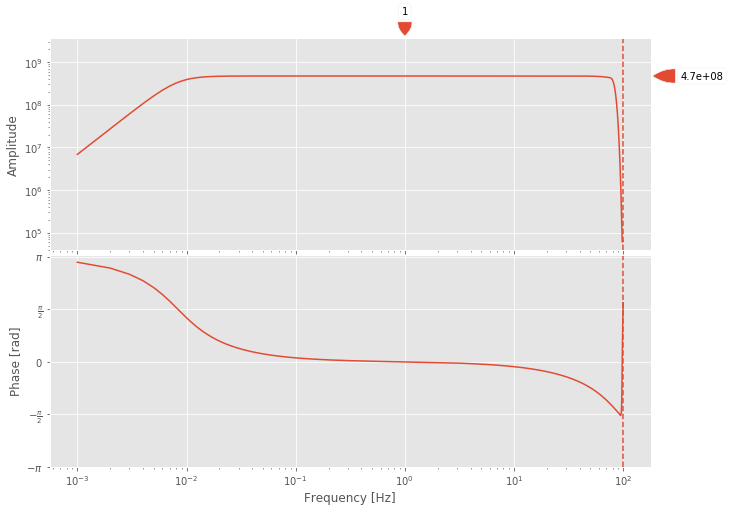

Channel 'HHZ', Location '' 
	Time range: -- - --
	Latitude: 1.00, Longitude: 2.00, Elevation: 345.0 m, Local Depth: 10.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Sampling Rate: 200.00 Hz
	Response information available


In [15]:
cha = inv[0][0][0]

cha.plot(min_freq=0.001)
print(cha)

The contents of the NRL can be inspected in an interactive shell:

In [16]:
nrl.sensors

Select the sensor manufacturer (27 items):
  'CEA-DASE', 'CME', 'Chaparral Physics', 'EQMet', 'Eentec', 'GEObit'
  'GEOsig', 'Generic', 'Geo Space/OYO', 'Geodevice', 'Geotech',
  'Guralp', 'Hyperion', 'IESE', 'Kinemetrics', 'LaHusen', 'Lennartz',
  'Lunitek', 'Metrozet', 'Nanometrics', 'OSOP', 'REF TEK',
  'Sercel/Mark Products', 'Silicon Audio', 'SolGeo',
  'Sprengnether (now Eentec)', 'Streckeisen'

In [17]:
nrl.sensors['Streckeisen']

Select the Streckeisen sensor model (5 items):
  'STS-1', 'STS-2', 'STS-2.5', 'STS-3', 'STS-5A'

In [18]:
nrl.dataloggers

Select the datalogger manufacturer (19 items):
  'Agecodagis', 'DAQ Systems (NetDAS)', 'EQMet', 'Earth Data',
  'Eentec', 'Generic', 'GeoBIT', 'Geodevice', 'Geotech', 'Guralp',
  'Kinemetrics', 'Lunitek', 'Nanometrics', 'OSOP', 'Omnirecs',
  'Quanterra', 'REF TEK', 'Seismic Source', 'SolGeo'